Data Science Revealed by Tshepo Chris Nokeri, Apress. 2021

# Chapter 8: Market Trend Classification using ML and DL

Recognizing demand and supply activities helps investors make well-informed investment decisions. In this chapter, we create a categorical variable with two outcomes 0 and 1, where 0 represents a downward market and 1 represents an upward market. 

To install Keras in the Python environment, we use pip install Keras and on the conda environment we use conda install -c conda-forge keras

## Import Dependencies

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set("talk","ticks",font_scale=1,font="Calibri")
from pylab import rcParams
plt.rcParams["figure.dpi"] = 300
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm
from pandas_datareader import data
start_date = '2010-11-01'
end_date = '2020-11-01'
ticker = 'CL=F'
df = data.get_data_yahoo(ticker, start_date, end_date,)
df.head(2)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-11-01,83.860001,81.320000,81.449997,82.949997,358535.0,82.949997
2010-11-02,84.470001,82.830002,82.879997,83.900002,281834.0,83.900002


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2497 entries, 2010-11-01 to 2020-10-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2497 non-null   float64
 1   Low        2497 non-null   float64
 2   Open       2497 non-null   float64
 3   Close      2497 non-null   float64
 4   Volume     2497 non-null   float64
 5   Adj Close  2497 non-null   float64
dtypes: float64(6)
memory usage: 136.6 KB


# Data Preprocessing

In [27]:
df['pct_change'] = df["Adj Close"].pct_change()
df['log_ret'] = np.log(df["Adj Close"]) - np.log(df["Adj Close"].shift(1))

In [28]:
df.head()

,High,Low,Open,Close,Volume,Adj Close,pct_change,log_ret
Date,,,,,,,,
2010-11-01,83.860001,81.320000,81.449997,82.949997,358535.0,82.949997,NaN,NaN
2010-11-02,84.470001,82.830002,82.879997,83.900002,281834.0,83.900002,0.011453,0.011388
2010-11-03,85.360001,83.570000,84.370003,84.690002,393735.0,84.690002,0.009416,0.009372
2010-11-04,86.830002,84.919998,85.089996,86.489998,317997.0,86.489998,0.021254,0.021031
2010-11-05,87.430000,85.959999,86.599998,86.849998,317997.0,86.849998,0.004162,0.004154


In [29]:
df = df.dropna()

In [30]:
df['pct_change'] = df["Adj Close"].pct_change()
df['log_ret'] = np.log(df["Adj Close"]) - np.log(df["Adj Close"].shift(1))
df.head()

,High,Low,Open,Close,Volume,Adj Close,pct_change,log_ret
Date,,,,,,,,
2010-11-02,84.470001,82.830002,82.879997,83.900002,281834.0,83.900002,NaN,NaN
2010-11-03,85.360001,83.570000,84.370003,84.690002,393735.0,84.690002,0.009416,0.009372
2010-11-04,86.830002,84.919998,85.089996,86.489998,317997.0,86.489998,0.021254,0.021031
2010-11-05,87.430000,85.959999,86.599998,86.849998,317997.0,86.849998,0.004162,0.004154
2010-11-08,87.489998,85.959999,87.389999,87.059998,309966.0,87.059998,0.002418,0.002415


In [31]:
df = df.dropna()
df['direction'] = np.sign(df['pct_change']).astype(int)
df.head(3)

,High,Low,Open,Close,Volume,Adj Close,pct_change,log_ret,direction
Date,,,,,,,,,
2010-11-03,85.360001,83.570000,84.370003,84.690002,393735.0,84.690002,0.009416,0.009372,1
2010-11-04,86.830002,84.919998,85.089996,86.489998,317997.0,86.489998,0.021254,0.021031,1
2010-11-05,87.430000,85.959999,86.599998,86.849998,317997.0,86.849998,0.004162,0.004154,1


In [32]:
df["direction"] = pd.get_dummies(df["direction"])
x=df.iloc[::,5:8]
x

,Adj Close,pct_change,log_ret
Date,,,
2010-11-03,84.690002,0.009416,0.009372
2010-11-04,86.489998,0.021254,0.021031
2010-11-05,86.849998,0.004162,0.004154
2010-11-08,87.059998,0.002418,0.002415
2010-11-09,86.720001,-0.003905,-0.003913
...,...,...,...
2020-10-26,38.560001,-0.032371,-0.032907
2020-10-27,39.570000,0.026193,0.025856
2020-10-28,37.389999,-0.055092,-0.056668


In [33]:

y=df.iloc[::,-1]
y

Date
2010-11-03    0
2010-11-04    0
2010-11-05    0
2010-11-08    0
2010-11-09    1
             ..
2020-10-26    1
2020-10-27    0
2020-10-28    1
2020-10-29    1
2020-10-30    1
Name: direction, Length: 2493, dtype: uint8

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x= scaler.fit_transform(x)

## Develop the Logistic Classifier

In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(x , y, test_size=0.2,shuffle= False)
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Predictions

In [36]:
y_predlogreg = logreg.predict(x_test)
pd.DataFrame(y_predlogreg,columns=["Forecast"])

,Forecast
0,1
1,1
2,1
3,1
4,1
...,...
494,1
495,0
496,1
497,1


## Confusion Matrix

In [37]:
from sklearn import metrics
cmatlogreg = pd.DataFrame(metrics.confusion_matrix(y_test,y_predlogreg),
                          index=["Actual: No","Actual: Yes"],
                          columns=("Predicted: No","Predicted:Yes"))
cmatlogreg

,Predicted: No,Predicted:Yes
Actual: No,256,0
Actual: Yes,0,243


## Classification Report

In [38]:
creportlogreg =pd.DataFrame(metrics.classification_report(y_test,y_predlogreg,output_dict=True)).transpose()
creportlogreg

,precision,recall,f1-score,support
0,1.0,1.0,1.0,256.0
1,1.0,1.0,1.0,243.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,499.0
weighted avg,1.0,1.0,1.0,499.0


## ROC Curve

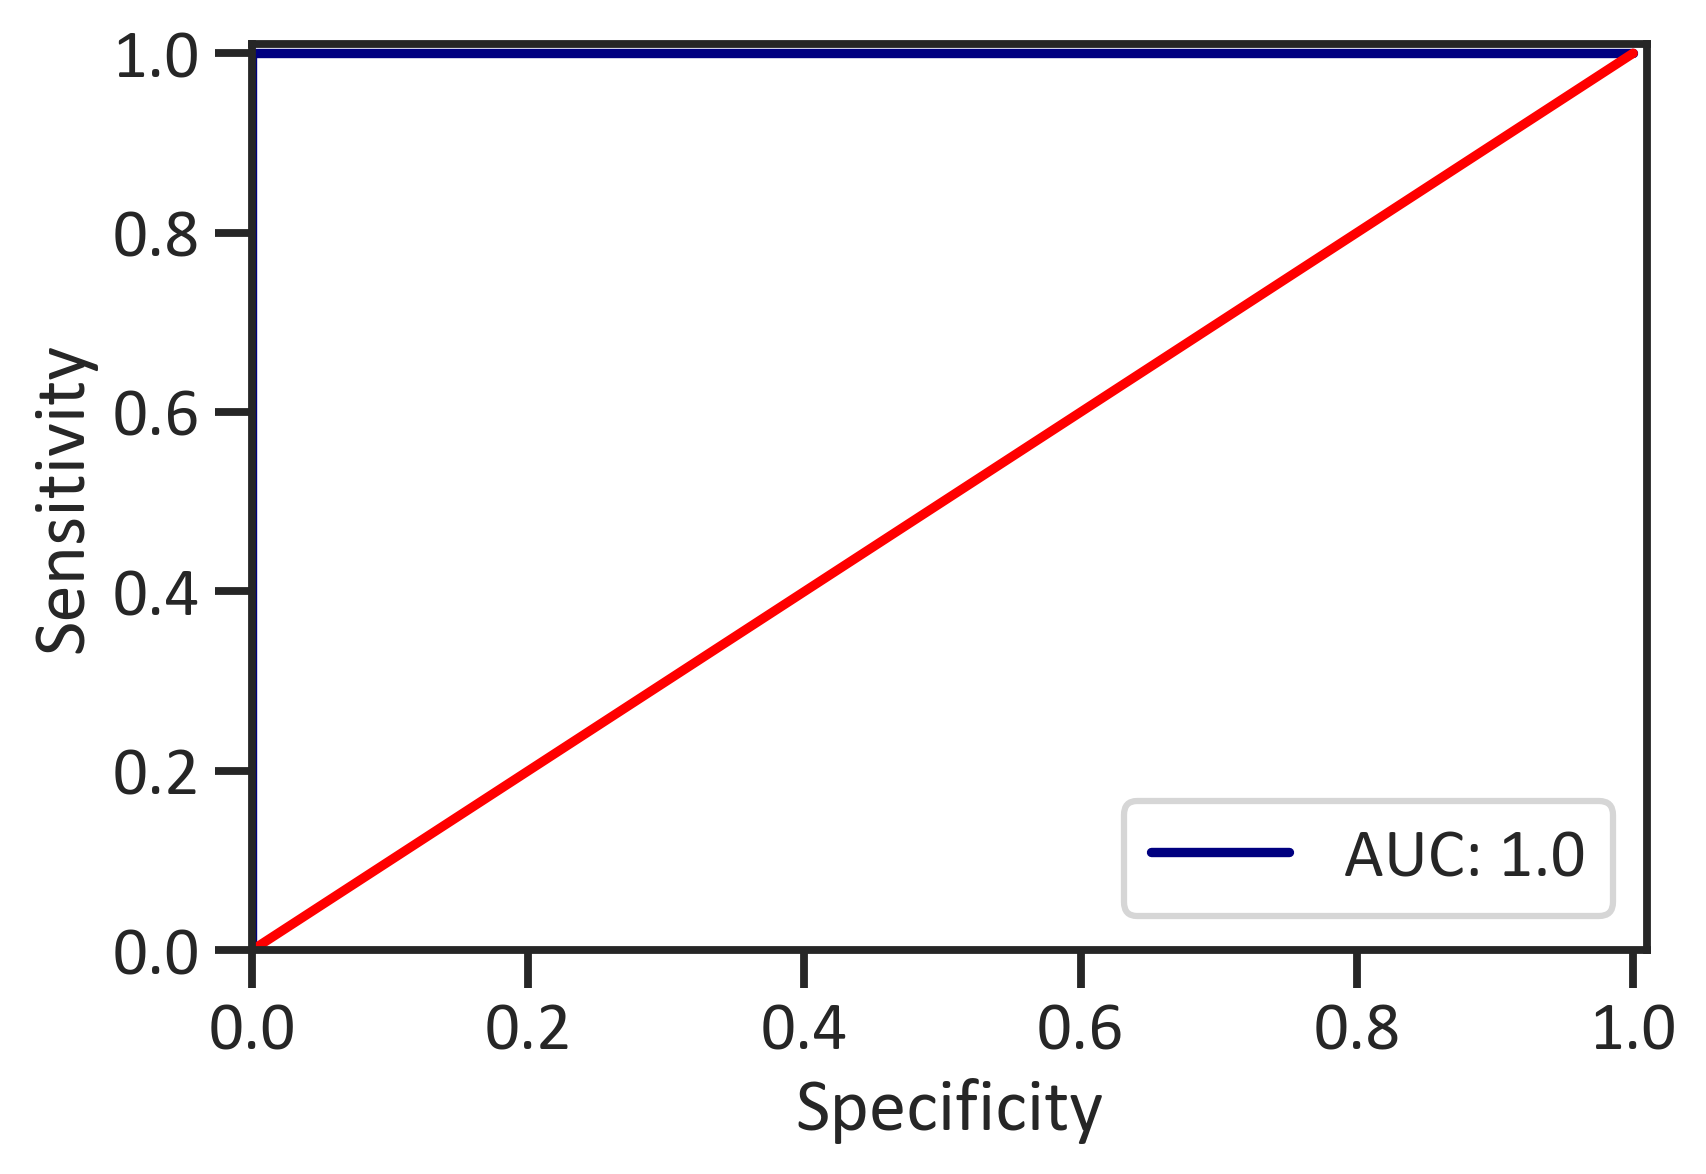

In [39]:
y_predlogreg_proba = logreg.predict_proba(x_test)[::,1]
fprlogreg, tprlogreg, _ =metrics.roc_curve(y_test,y_predlogreg_proba)
auclogreg = metrics.roc_auc_score(y_test, y_predlogreg_proba)
plt.plot(fprlogreg, tprlogreg, label="AUC: "+str(auclogreg),color="navy")
plt.plot([0,1],[0,1],color="red")
plt.xlim([0.00,1.01])
plt.ylim([0.00,1.01])
plt.xlabel("Specificity")
plt.ylabel("Sensitivity")
plt.legend(loc=4)
plt.show()


## Learning Curve

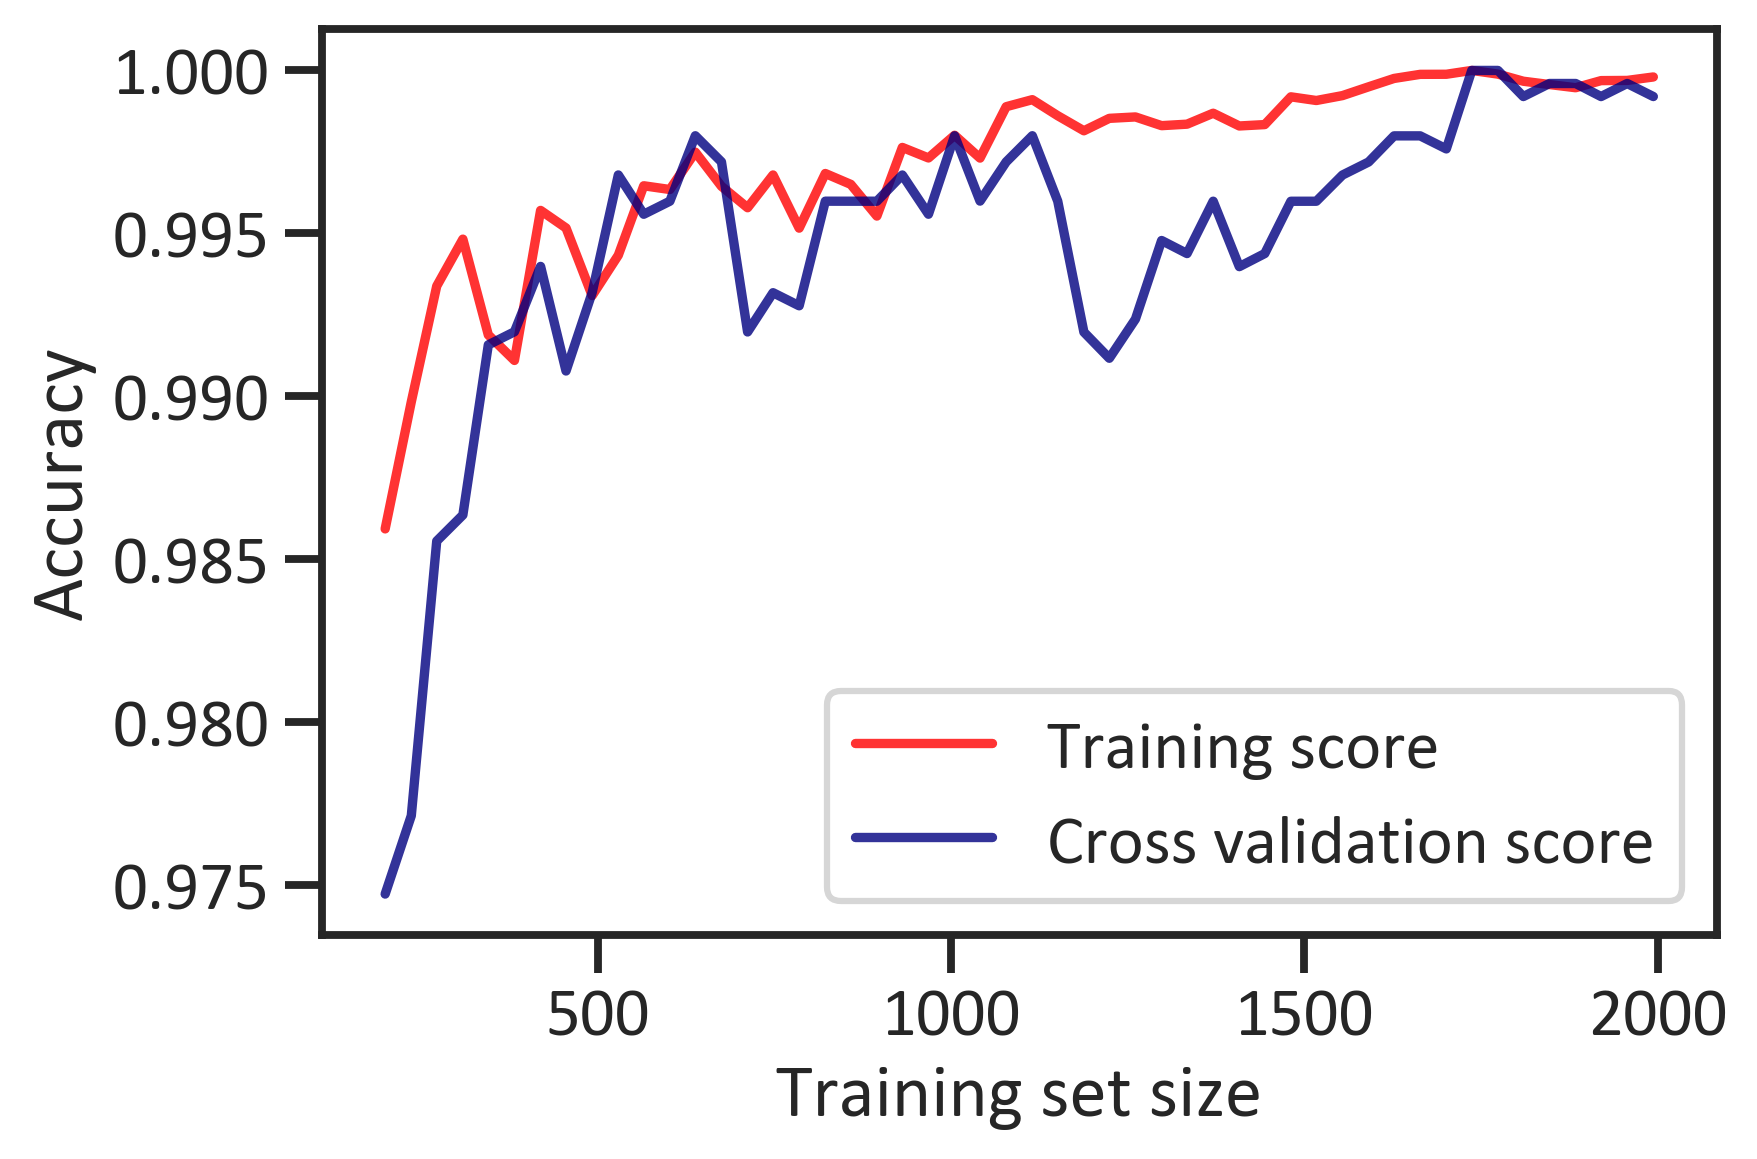

In [40]:
from sklearn.model_selection import learning_curve
trainsizelogreg, trainscorelogreg, testscorelogreg =learning_curve(logreg, x, y, cv=5, n_jobs=5,train_sizes=np.linspace(0.1,1.0,50))
trainscorelogreg_mean = np.mean(trainscorelogreg,axis=1)
testscorelogreg_mean = np.mean(testscorelogreg,axis=1)
plt.plot(trainsizelogreg,trainscorelogreg_mean,color="red",label="Training score", alpha=0.8)
plt.plot(trainsizelogreg,testscorelogreg_mean,color="navy",label="Cross validation score", alpha=0.8)
plt.xlabel("Training set size")
plt.ylabel("Accuracy")
plt.legend(loc=4)
plt.show()

## Multilayer Perceptron 

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,test_size=0.2,random_state=0)

In [42]:
from keras import Sequential, regularizers
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier

## Architecture

In [43]:
def create_dnn_model1(optimizer="adam"):
    model1 = Sequential()
    model1.add(Dense(3, input_dim=3, activation="sigmoid"))
    model1.add(Dense(3, activation="relu"))
    model1.add(Dense(1, activation="relu"))
    model1.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return model1

## Wrap

In [44]:
model1 = KerasClassifier(build_fn=create_dnn_model1)

## Develop the MLP Classifier

In [45]:
history1 = model1.fit(x_train, y_train, validation_data=(x_val,y_val), batch_size=15, epochs=64)
history1

Train on 1595 samples, validate on 399 samples
Epoch 1/64
1595/1595 [==============================] - 0s 60us/step - loss: 7.5900 - accuracy: 0.5292 - val_loss: 7.5945 - val_accuracy: 0.5288
Epoch 2/64
1595/1595 [==============================] - 0s 64us/step - loss: 7.5891 - accuracy: 0.5292 - val_loss: 7.5945 - val_accuracy: 0.5288
Epoch 3/64
1595/1595 [==============================] - 0s 58us/step - loss: 7.5891 - accuracy: 0.5292 - val_loss: 7.5945 - val_accuracy: 0.5288
Epoch 4/64
1595/1595 [==============================] - 0s 58us/step - loss: 7.5891 - accuracy: 0.5292 - val_loss: 7.5945 - val_accuracy: 0.5288
Epoch 5/64
1595/1595 [==============================] - 0s 54us/step - loss: 7.5891 - accuracy: 0.5292 - val_loss: 7.5945 - val_accuracy: 0.5288
Epoch 6/64
1595/1595 [==============================] - 0s 55us/step - loss: 7.5891 - accuracy: 0.5292 - val_loss: 7.5945 - val_accuracy: 0.5288
Epoch 7/64
1595/1595 [==============================] - 0s 57us/step - loss: 7.5891

Epoch 57/64
1595/1595 [==============================] - 0s 120us/step - loss: 7.5891 - accuracy: 0.5292 - val_loss: 7.5945 - val_accuracy: 0.5288
Epoch 58/64
1595/1595 [==============================] - 0s 136us/step - loss: 7.5891 - accuracy: 0.5292 - val_loss: 7.5945 - val_accuracy: 0.5288
Epoch 59/64
1595/1595 [==============================] - 0s 96us/step - loss: 7.5891 - accuracy: 0.5292 - val_loss: 7.5945 - val_accuracy: 0.5288
Epoch 60/64
1595/1595 [==============================] - 0s 109us/step - loss: 7.5891 - accuracy: 0.5292 - val_loss: 7.5945 - val_accuracy: 0.5288
Epoch 61/64
1595/1595 [==============================] - 0s 107us/step - loss: 7.5891 - accuracy: 0.5292 - val_loss: 7.5945 - val_accuracy: 0.5288
Epoch 62/64
1595/1595 [==============================] - 0s 102us/step - loss: 7.5891 - accuracy: 0.5292 - val_loss: 7.5945 - val_accuracy: 0.5288
Epoch 63/64
1595/1595 [==============================] - 0s 95us/step - loss: 7.5891 - accuracy: 0.5292 - val_loss: 7.5

## Classification Report

In [46]:
y_predmodel1 = model1.predict(x_test)
creportmodel1 = pd.DataFrame(metrics.classification_report(y_test,y_predmodel1, output_dict=True)).transpose()
creportmodel1

,precision,recall,f1-score,support
0,0.468938,1.000000,0.638472,234.000000
1,0.000000,0.000000,0.000000,265.000000
accuracy,0.468938,0.468938,0.468938,0.468938
macro avg,0.234469,0.500000,0.319236,499.000000
weighted avg,0.219903,0.468938,0.299404,499.000000


## Loss

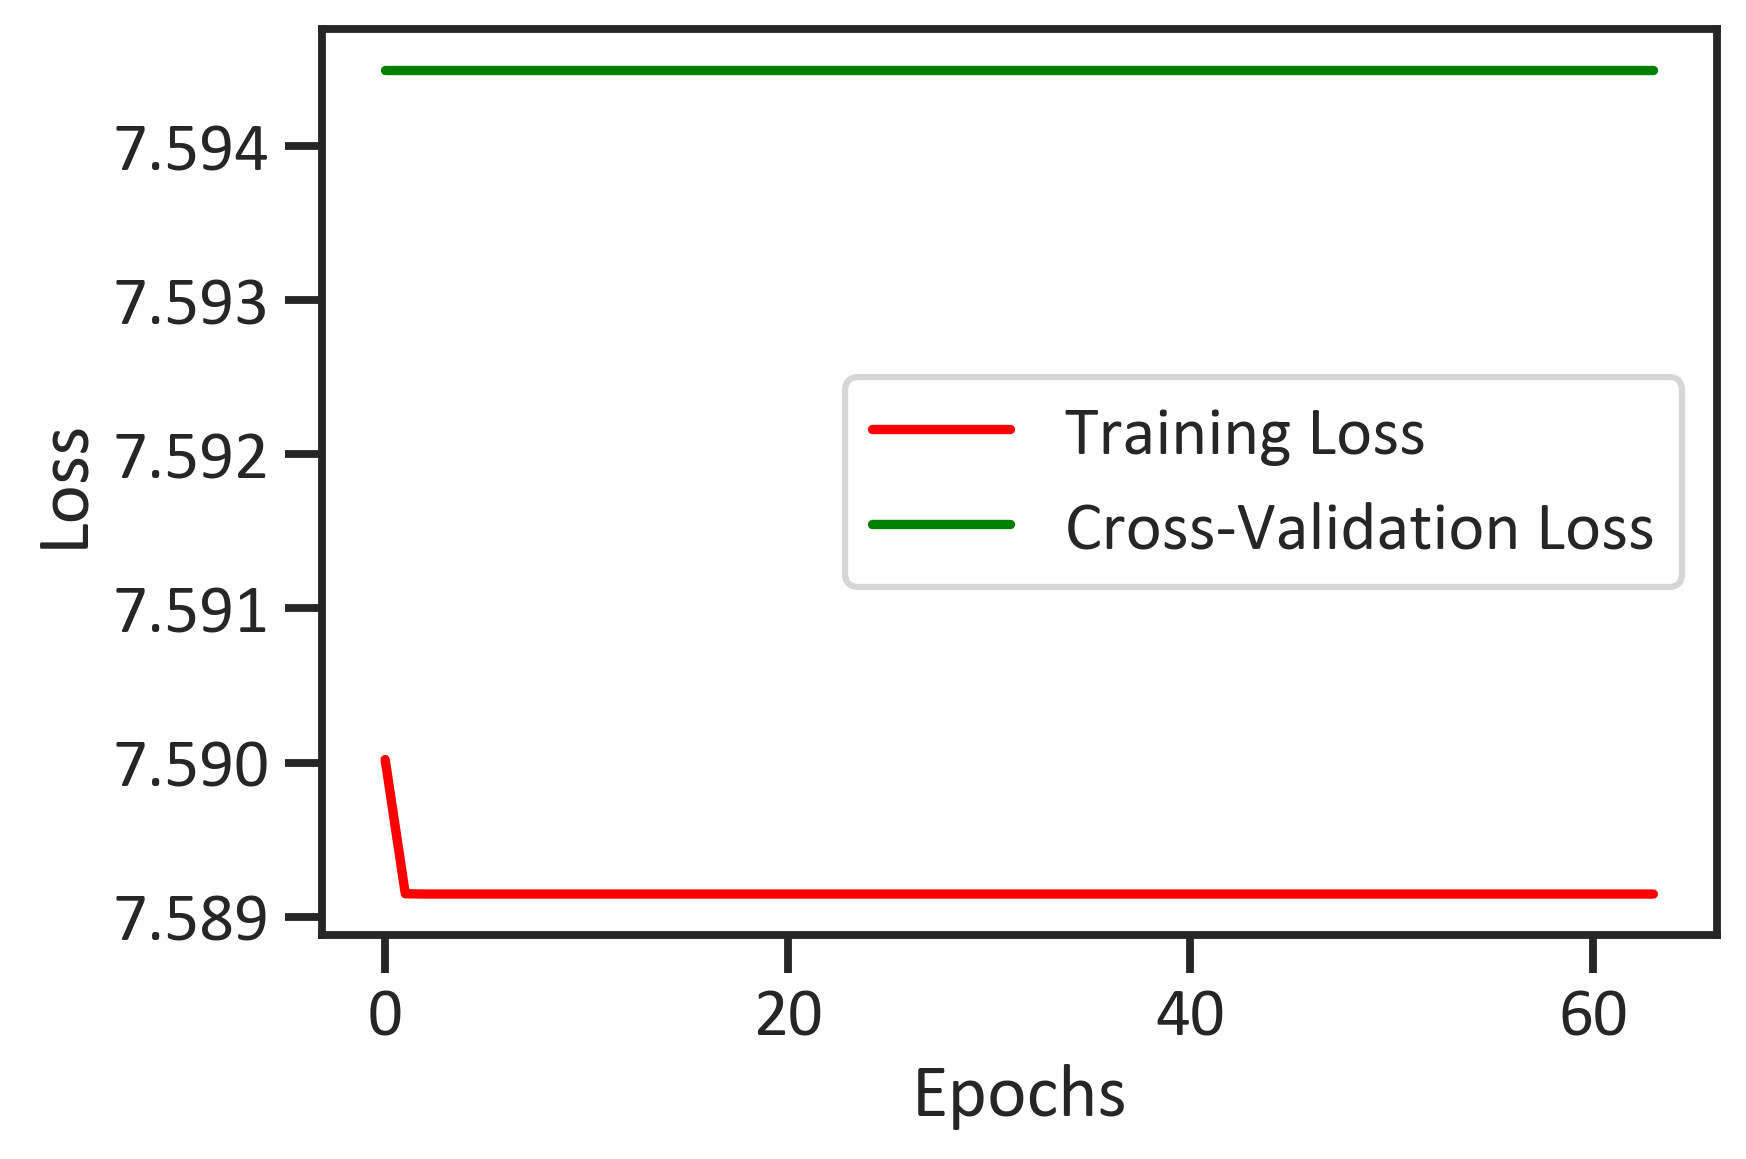

In [47]:
plt.plot(history1.history["loss"],color="red",label="Training Loss")
plt.plot(history1.history["val_loss"],color="green",label="Cross-Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc="best")
plt.show()

## Accuracy

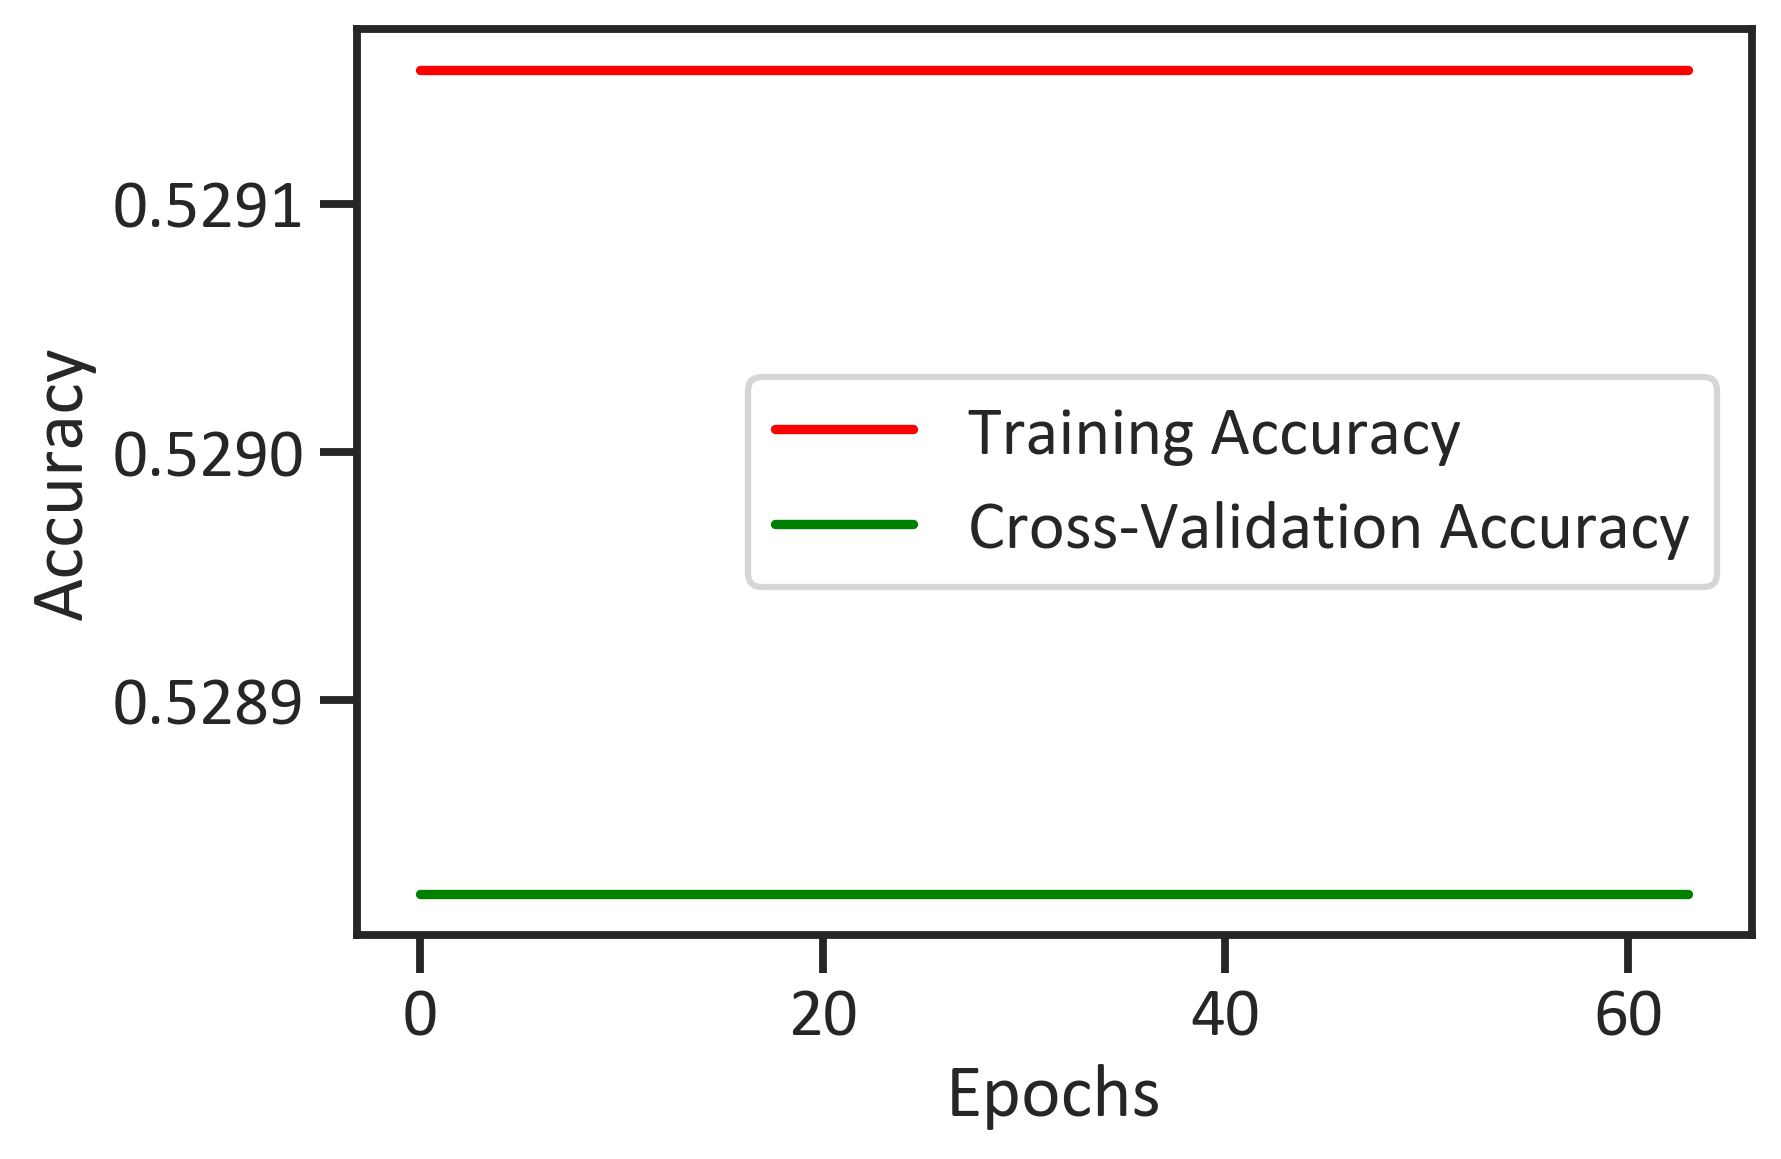

In [48]:
plt.plot(history1.history["accuracy"],color="red",label="Training Accuracy")
plt.plot(history1.history["val_accuracy"],color="green",label="Cross-Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.show()

In [49]:
history1.history["loss"]

[7.590019765692444,
 7.589149161192317,
 7.589146963854942,
 7.589146963854942,
 7.5891469728236665,
 7.589146968339304,
 7.589146977308028,
 7.589146969834092,
 7.589146975439544,
 7.5891469608051505,
 7.589146968652784,
 7.5891469731371455,
 7.5891469548862185,
 7.589146968652784,
 7.589146969834092,
 7.58914695937058,
 7.589146932464408,
 7.589146945917494,
 7.589146977621508,
 7.589146960865367,
 7.589146956007308,
 7.589146960865367,
 7.589146965349729,
 7.5891469728236665,
 7.589146968339304,
 7.589146939564648,
 7.589146956381006,
 7.58914695937058,
 7.589146963854942,
 7.589146948533372,
 7.589146978429119,
 7.589146968339304,
 7.58914695937058,
 7.589146963854942,
 7.58914695968406,
 7.58914695937058,
 7.589146974318454,
 7.589146963854942,
 7.589146968339304,
 7.589146927980046,
 7.589146945917494,
 7.5891469369487705,
 7.589146977308028,
 7.58914695937058,
 7.589146968339304,
 7.589146968339304,
 7.589146968339304,
 7.58914698179239,
 7.589146968339304,
 7.589146956381006,
 

In [50]:
history1.history["val_loss"]

[7.594490959232015,
 7.594490959232015,
 7.594490959232015,
 7.594490959232015,
 7.594490959232015,
 7.594490959232015,
 7.594490959232015,
 7.594490959232015,
 7.594490959232015,
 7.594490959232015,
 7.594490959232015,
 7.594490959232015,
 7.594490959232015,
 7.594490959232015,
 7.594490959232015,
 7.594490959232015,
 7.594490959232015,
 7.594490959232015,
 7.594490959232015,
 7.594490959232015,
 7.594490959232015,
 7.594490959232015,
 7.594490959232015,
 7.594490959232015,
 7.594490959232015,
 7.594490959232015,
 7.594490959232015,
 7.594490959232015,
 7.594490959232015,
 7.594490959232015,
 7.594490959232015,
 7.594490959232015,
 7.594490959232015,
 7.594490959232015,
 7.594490959232015,
 7.594490959232015,
 7.594490959232015,
 7.594490959232015,
 7.594490959232015,
 7.594490959232015,
 7.594490959232015,
 7.594490959232015,
 7.594490959232015,
 7.594490959232015,
 7.594490959232015,
 7.594490959232015,
 7.594490959232015,
 7.594490959232015,
 7.594490959232015,
 7.594490959232015,


In [51]:
history1.history["accuracy"]

[array(0.5291536, dtype=float32),
 array(0.5291536, dtype=float32),
 array(0.5291536, dtype=float32),
 array(0.5291536, dtype=float32),
 array(0.5291536, dtype=float32),
 array(0.5291536, dtype=float32),
 array(0.5291536, dtype=float32),
 array(0.5291536, dtype=float32),
 array(0.5291536, dtype=float32),
 array(0.5291536, dtype=float32),
 array(0.5291536, dtype=float32),
 array(0.5291536, dtype=float32),
 array(0.5291536, dtype=float32),
 array(0.5291536, dtype=float32),
 array(0.5291536, dtype=float32),
 array(0.5291536, dtype=float32),
 array(0.5291536, dtype=float32),
 array(0.5291536, dtype=float32),
 array(0.5291536, dtype=float32),
 array(0.5291536, dtype=float32),
 array(0.5291536, dtype=float32),
 array(0.5291536, dtype=float32),
 array(0.5291536, dtype=float32),
 array(0.5291536, dtype=float32),
 array(0.5291536, dtype=float32),
 array(0.5291536, dtype=float32),
 array(0.5291536, dtype=float32),
 array(0.5291536, dtype=float32),
 array(0.5291536, dtype=float32),
 array(0.52915

In [52]:
history1.history["val_accuracy"]

[0.5288220643997192,
 0.5288220643997192,
 0.5288220643997192,
 0.5288220643997192,
 0.5288220643997192,
 0.5288220643997192,
 0.5288220643997192,
 0.5288220643997192,
 0.5288220643997192,
 0.5288220643997192,
 0.5288220643997192,
 0.5288220643997192,
 0.5288220643997192,
 0.5288220643997192,
 0.5288220643997192,
 0.5288220643997192,
 0.5288220643997192,
 0.5288220643997192,
 0.5288220643997192,
 0.5288220643997192,
 0.5288220643997192,
 0.5288220643997192,
 0.5288220643997192,
 0.5288220643997192,
 0.5288220643997192,
 0.5288220643997192,
 0.5288220643997192,
 0.5288220643997192,
 0.5288220643997192,
 0.5288220643997192,
 0.5288220643997192,
 0.5288220643997192,
 0.5288220643997192,
 0.5288220643997192,
 0.5288220643997192,
 0.5288220643997192,
 0.5288220643997192,
 0.5288220643997192,
 0.5288220643997192,
 0.5288220643997192,
 0.5288220643997192,
 0.5288220643997192,
 0.5288220643997192,
 0.5288220643997192,
 0.5288220643997192,
 0.5288220643997192,
 0.5288220643997192,
 0.5288220643